# Heart Disease Risk Prediction - Model Training

This notebook trains multiple machine learning models on the heart disease risk dataset, evaluates them using validation and test accuracy with confidence metrics, and saves each model separately using joblib.

## Features:
- **Symptoms**: Chest Pain, Shortness of Breath, Fatigue, Palpitations, Dizziness, Swelling, Radiating Pain, Cold Sweats
- **Risk Factors**: Age, High BP, High Cholesterol, Diabetes, Smoking, Obesity, Sedentary Lifestyle, Family History, Chronic Stress, Gender

## Target: Heart_Risk (0: Low Risk, 1: High Risk)

## 1. Import Required Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Sklearn - preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report, 
                             confusion_matrix)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# XGBoost and LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# For saving models
import joblib

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('Heart Disease Prediction Dataset - Kaggle.csv')

# Display basic information
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nShape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1] - 1}")  # Excluding target

# Display first few rows
print("\n" + "=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
df.head()

DATASET OVERVIEW

Shape: (70000, 19)
Total samples: 70000
Total features: 18

FIRST 5 ROWS


,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [3]:
# Display column info and check for missing values
print("=" * 60)
print("COLUMN INFORMATION")
print("=" * 60)
print(f"\nColumns: {list(df.columns)}")

print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.dtypes)

print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
df.describe()

COLUMN INFORMATION

Columns: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age', 'Heart_Risk']

DATA TYPES
Chest_Pain             float64
Shortness_of_Breath    float64
Fatigue                float64
Palpitations           float64
Dizziness              float64
Swelling               float64
Pain_Arms_Jaw_Back     float64
Cold_Sweats_Nausea     float64
High_BP                float64
High_Cholesterol       float64
Diabetes               float64
Smoking                float64
Obesity                float64
Sedentary_Lifestyle    float64
Family_History         float64
Chronic_Stress         float64
Gender                 float64
Age                    float64
Heart_Risk             float64
dtype: object

MISSING VALUES
No missing values found!

STATISTICAL SUMMARY


,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


TARGET VARIABLE DISTRIBUTION (Heart_Risk)

0 (Low Risk): 35000 (50.00%)
1 (High Risk): 35000 (50.00%)


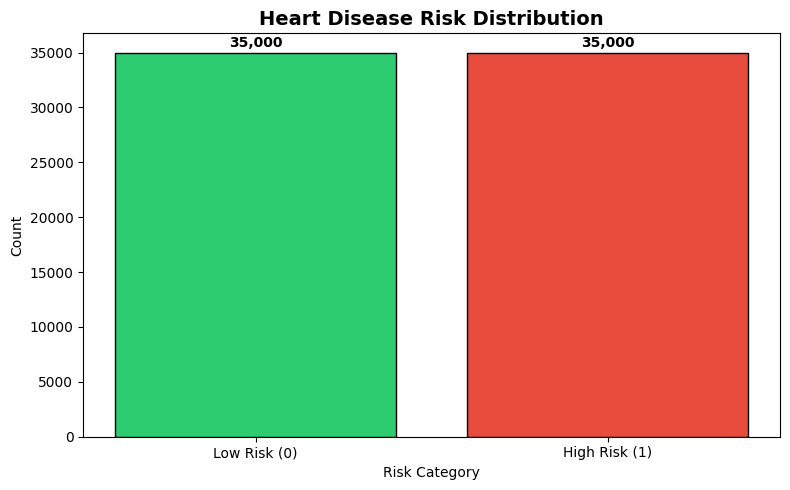

In [4]:
# Target variable distribution
print("=" * 60)
print("TARGET VARIABLE DISTRIBUTION (Heart_Risk)")
print("=" * 60)
target_dist = df['Heart_Risk'].value_counts()
print(f"\n0 (Low Risk): {target_dist[0]} ({target_dist[0]/len(df)*100:.2f}%)")
print(f"1 (High Risk): {target_dist[1]} ({target_dist[1]/len(df)*100:.2f}%)")

# Visualize target distribution
plt.figure(figsize=(8, 5))
colors = ['#2ecc71', '#e74c3c']
plt.bar(['Low Risk (0)', 'High Risk (1)'], target_dist.values, color=colors, edgecolor='black')
plt.title('Heart Disease Risk Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Risk Category')
plt.ylabel('Count')
for i, v in enumerate(target_dist.values):
    plt.text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [5]:
# Separate features (X) and target (y)
X = df.drop('Heart_Risk', axis=1)
y = df['Heart_Risk']

print("Feature columns:")
print(list(X.columns))
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Handle missing values if any (drop rows with NaN)
if X.isnull().sum().sum() > 0:
    print(f"\nDropping {X.isnull().any(axis=1).sum()} rows with missing values...")
    mask = ~X.isnull().any(axis=1)
    X = X[mask]
    y = y[mask]
    print(f"New shape after dropping: {X.shape}")
else:
    print("\nNo missing values to handle.")

Feature columns:
['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age']

Features shape: (70000, 18)
Target shape: (70000,)

No missing values to handle.


## 4. Split Data into Train, Validation, and Test Sets

In [6]:
# Split: 60% train, 20% validation, 20% test
RANDOM_STATE = 42

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Second split: 75% of temp for train (60% of total), 25% for val (20% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp
)

print("=" * 60)
print("DATA SPLIT SUMMARY")
print("=" * 60)
print(f"\nTraining set:   {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:,} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\n" + "=" * 60)
print("CLASS DISTRIBUTION IN EACH SET")
print("=" * 60)
print(f"\nTraining:   Low Risk: {(y_train==0).sum():,} | High Risk: {(y_train==1).sum():,}")
print(f"Validation: Low Risk: {(y_val==0).sum():,} | High Risk: {(y_val==1).sum():,}")
print(f"Test:       Low Risk: {(y_test==0).sum():,} | High Risk: {(y_test==1).sum():,}")

DATA SPLIT SUMMARY

Training set:   42,000 samples (60.0%)
Validation set: 14,000 samples (20.0%)
Test set:       14,000 samples (20.0%)

CLASS DISTRIBUTION IN EACH SET

Training:   Low Risk: 21,000 | High Risk: 21,000
Validation: Low Risk: 7,000 | High Risk: 7,000
Test:       Low Risk: 7,000 | High Risk: 7,000


In [7]:
# Apply StandardScaler for feature normalization
scaler = StandardScaler()

# Fit on training data, transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied using StandardScaler")
print(f"Training features scaled - shape: {X_train_scaled.shape}")
print(f"Validation features scaled - shape: {X_val_scaled.shape}")
print(f"Test features scaled - shape: {X_test_scaled.shape}")

Feature scaling applied using StandardScaler
Training features scaled - shape: (42000, 18)
Validation features scaled - shape: (14000, 18)
Test features scaled - shape: (14000, 18)


## 5. Define and Train Multiple Models

In [8]:
# Define dictionary of models (excluding SVM for faster training)
models = {
    'Logistic_Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
    'Gradient_Boosting': GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=RANDOM_STATE, use_label_encoder=False, 
                             eval_metric='logloss', verbosity=0),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=RANDOM_STATE, verbose=-1),
    'Decision_Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'Naive_Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=RANDOM_STATE)
}

print("=" * 60)
print("MODELS TO TRAIN")
print("=" * 60)
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name.replace('_', ' ')}")

MODELS TO TRAIN
1. Logistic Regression
2. Random Forest
3. Gradient Boosting
4. XGBoost
5. LightGBM
6. Decision Tree
7. KNN
8. Naive Bayes
9. AdaBoost


In [9]:
# Train all models
import time

trained_models = {}
training_times = {}

print("=" * 60)
print("TRAINING MODELS")
print("=" * 60)

for name, model in models.items():
    print(f"\n Training {name.replace('_', ' ')}...", end=" ")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    elapsed_time = time.time() - start_time
    trained_models[name] = model
    training_times[name] = elapsed_time
    
    print(f"Done! ({elapsed_time:.2f}s)")

print("\n" + "=" * 60)
print("ALL MODELS TRAINED SUCCESSFULLY!")
print("=" * 60)

TRAINING MODELS

 Training Logistic Regression... Done! (0.18s)

 Training Random Forest... Done! (1.24s)

 Training Gradient Boosting... Done! (4.71s)

 Training XGBoost... Done! (0.63s)

 Training LightGBM... Done! (3.55s)

 Training Decision Tree... Done! (0.11s)

 Training KNN... Done! (0.00s)

 Training Naive Bayes... Done! (0.03s)

 Training AdaBoost... Done! (4.32s)

ALL MODELS TRAINED SUCCESSFULLY!


## 6. Evaluate Models on Validation Set

In [10]:
# Evaluate all models on validation set
def calculate_confidence(model, X, y_true):
    """Calculate mean prediction confidence for correct predictions"""
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(X)
        y_pred = model.predict(X)
        
        # Get probability of predicted class
        pred_confidence = np.max(proba, axis=1)
        
        # Mean confidence for all predictions
        mean_confidence = np.mean(pred_confidence)
        
        # Mean confidence for correct predictions
        correct_mask = (y_pred == y_true)
        correct_confidence = np.mean(pred_confidence[correct_mask]) if correct_mask.sum() > 0 else 0
        
        return mean_confidence, correct_confidence
    else:
        return None, None

# Store validation results
val_results = []

print("=" * 60)
print("VALIDATION SET EVALUATION")
print("=" * 60)

for name, model in trained_models.items():
    y_val_pred = model.predict(X_val_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, zero_division=0)
    recall = recall_score(y_val, y_val_pred, zero_division=0)
    f1 = f1_score(y_val, y_val_pred, zero_division=0)
    
    # Calculate confidence
    mean_conf, correct_conf = calculate_confidence(model, X_val_scaled, y_val)
    
    # Calculate ROC-AUC if probability is available
    if hasattr(model, 'predict_proba'):
        y_val_proba = model.predict_proba(X_val_scaled)[:, 1]
        roc_auc = roc_auc_score(y_val, y_val_proba)
    else:
        roc_auc = None
    
    val_results.append({
        'Model': name.replace('_', ' '),
        'Val_Accuracy': accuracy,
        'Val_Precision': precision,
        'Val_Recall': recall,
        'Val_F1': f1,
        'Val_ROC_AUC': roc_auc,
        'Val_Mean_Confidence': mean_conf,
        'Val_Correct_Confidence': correct_conf,
        'Training_Time': training_times[name]
    })

# Create DataFrame
val_df = pd.DataFrame(val_results)
val_df = val_df.sort_values('Val_Accuracy', ascending=False).reset_index(drop=True)

print("\nValidation Results (sorted by accuracy):\n")
display_cols = ['Model', 'Val_Accuracy', 'Val_F1', 'Val_ROC_AUC', 'Val_Mean_Confidence']
print(val_df[display_cols].to_string(index=False))

VALIDATION SET EVALUATION

Validation Results (sorted by accuracy):

              Model  Val_Accuracy   Val_F1  Val_ROC_AUC  Val_Mean_Confidence
           AdaBoost      0.993286 0.993289     0.999713             0.717363
  Gradient Boosting      0.992143 0.992146     0.999683             0.980608
           LightGBM      0.992071 0.992072     0.999651             0.990409
      Random Forest      0.991500 0.991499     0.999428             0.977528
Logistic Regression      0.991286 0.991284     0.999521             0.992203
            XGBoost      0.991071 0.991072     0.999546             0.994945
        Naive Bayes      0.990571 0.990580     0.999497             0.994170
                KNN      0.988429 0.988434     0.996063             0.989829
      Decision Tree      0.981143 0.981164     0.981143             1.000000


## 7. Evaluate Models on Test Set

In [11]:
# Evaluate all models on test set
test_results = []

print("=" * 60)
print("TEST SET EVALUATION")
print("=" * 60)

for name, model in trained_models.items():
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, zero_division=0)
    recall = recall_score(y_test, y_test_pred, zero_division=0)
    f1 = f1_score(y_test, y_test_pred, zero_division=0)
    
    # Calculate confidence
    mean_conf, correct_conf = calculate_confidence(model, X_test_scaled, y_test)
    
    # Calculate ROC-AUC if probability is available
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_proba)
    else:
        roc_auc = None
    
    test_results.append({
        'Model': name.replace('_', ' '),
        'Test_Accuracy': accuracy,
        'Test_Precision': precision,
        'Test_Recall': recall,
        'Test_F1': f1,
        'Test_ROC_AUC': roc_auc,
        'Test_Mean_Confidence': mean_conf,
        'Test_Correct_Confidence': correct_conf
    })

# Create DataFrame
test_df = pd.DataFrame(test_results)
test_df = test_df.sort_values('Test_Accuracy', ascending=False).reset_index(drop=True)

print("\nTest Results (sorted by accuracy):\n")
display_cols = ['Model', 'Test_Accuracy', 'Test_F1', 'Test_ROC_AUC', 'Test_Mean_Confidence']
print(test_df[display_cols].to_string(index=False))

TEST SET EVALUATION

Test Results (sorted by accuracy):

              Model  Test_Accuracy  Test_F1  Test_ROC_AUC  Test_Mean_Confidence
           AdaBoost       0.993643 0.993638      0.999690              0.716873
           LightGBM       0.993286 0.993287      0.999653              0.990980
  Gradient Boosting       0.993286 0.993285      0.999663              0.980720
      Random Forest       0.992429 0.992426      0.999434              0.977404
            XGBoost       0.991929 0.991930      0.999575              0.995368
Logistic Regression       0.991143 0.991140      0.999491              0.991592
        Naive Bayes       0.991071 0.991071      0.999482              0.993662
                KNN       0.988786 0.988791      0.996208              0.990114
      Decision Tree       0.980143 0.980137      0.980143              1.000000


In [12]:
# Detailed classification reports and confusion matrices for top models
print("=" * 60)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 60)

# Get top 3 models by test accuracy
top_models = test_df.head(3)['Model'].str.replace(' ', '_').tolist()

for name in top_models:
    model = trained_models[name]
    y_test_pred = model.predict(X_test_scaled)
    
    print(f"\n{'='*60}")
    print(f"Model: {name.replace('_', ' ')}")
    print("=" * 60)
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['Low Risk', 'High Risk']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    print(f"  TN: {cm[0,0]:,}  FP: {cm[0,1]:,}")
    print(f"  FN: {cm[1,0]:,}  TP: {cm[1,1]:,}")

DETAILED CLASSIFICATION REPORTS

Model: AdaBoost

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.99      0.99      0.99      7000
   High Risk       0.99      0.99      0.99      7000

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion Matrix:
  TN: 6,961  FP: 39
  FN: 50  TP: 6,950

Model: LightGBM

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.99      0.99      0.99      7000
   High Risk       0.99      0.99      0.99      7000

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion Matrix:
  TN: 6,952  FP: 48
  FN: 46  TP: 6,954

Model: Gradient Boosting

Classification Report:
              precision    recall  f1-score   support

    Low Ris

## 8. Save Models with Joblib

In [ ]:
import os

# Create models directory
models_dir = 'saved_models'
os.makedirs(models_dir, exist_ok=True)

print("=" * 60)
print("SAVING MODELS WITH JOBLIB")
print("=" * 60)

saved_files = []

# Save each trained model with scaler included
for name, model in trained_models.items():
    # Create a dictionary containing both model and scaler
    model_data = {
        'model': model,
        'scaler': scaler
    }
    
    filename = f"{name.lower()}_heart-prediction.joblib"
    filepath = os.path.join(models_dir, filename)
    joblib.dump(model_data, filepath)
    saved_files.append((name, filepath))
    print(f"✓ Saved: {filename}")

print("\n" + "=" * 60)
print(f"Total files saved: {len(saved_files)}")
print(f"Location: {os.path.abspath(models_dir)}")
print("=" * 60)

# List all saved files with sizes
print("\nSaved Files Summary:")
print("-" * 50)
for name, path in saved_files:
    size = os.path.getsize(path)
    size_kb = size / 1024
    print(f"{name:25} | {size_kb:>8.2f} KB")

SAVING MODELS WITH JOBLIB

✓ Saved: scaler.joblib
✓ Saved: logistic_regression_heart_risk.joblib
✓ Saved: random_forest_heart_risk.joblib
✓ Saved: gradient_boosting_heart_risk.joblib
✓ Saved: xgboost_heart_risk.joblib
✓ Saved: lightgbm_heart_risk.joblib
✓ Saved: decision_tree_heart_risk.joblib
✓ Saved: knn_heart_risk.joblib
✓ Saved: naive_bayes_heart_risk.joblib
✓ Saved: adaboost_heart_risk.joblib

Total files saved: 10
Location: c:\Users\Arkhins\Desktop\AI04\Upgrade.bak\Heart upgrade\saved_models

Saved Files Summary:
--------------------------------------------------
Scaler                    |     1.49 KB
Logistic_Regression       |     0.95 KB
Random_Forest             | 18157.20 KB
Gradient_Boosting         |   139.54 KB
XGBoost                   |   371.33 KB
LightGBM                  |   350.97 KB
Decision_Tree             |   127.88 KB
KNN                       |  6235.16 KB
Naive_Bayes               |     1.29 KB
AdaBoost                  |    63.85 KB


## 9. Compare Model Performance

In [14]:
# Merge validation and test results for comprehensive comparison
comparison_df = pd.merge(
    val_df[['Model', 'Val_Accuracy', 'Val_F1', 'Val_ROC_AUC', 'Val_Mean_Confidence', 'Training_Time']],
    test_df[['Model', 'Test_Accuracy', 'Test_F1', 'Test_ROC_AUC', 'Test_Mean_Confidence']],
    on='Model'
)

# Sort by test accuracy
comparison_df = comparison_df.sort_values('Test_Accuracy', ascending=False).reset_index(drop=True)

# Format for display
print("=" * 80)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)
print("\n")

# Create a nicely formatted table
display_df = comparison_df.copy()
display_df['Val_Accuracy'] = display_df['Val_Accuracy'].apply(lambda x: f"{x:.4f}")
display_df['Test_Accuracy'] = display_df['Test_Accuracy'].apply(lambda x: f"{x:.4f}")
display_df['Val_F1'] = display_df['Val_F1'].apply(lambda x: f"{x:.4f}")
display_df['Test_F1'] = display_df['Test_F1'].apply(lambda x: f"{x:.4f}")
display_df['Val_ROC_AUC'] = display_df['Val_ROC_AUC'].apply(lambda x: f"{x:.4f}" if x else "N/A")
display_df['Test_ROC_AUC'] = display_df['Test_ROC_AUC'].apply(lambda x: f"{x:.4f}" if x else "N/A")
display_df['Val_Mean_Confidence'] = display_df['Val_Mean_Confidence'].apply(lambda x: f"{x:.4f}" if x else "N/A")
display_df['Test_Mean_Confidence'] = display_df['Test_Mean_Confidence'].apply(lambda x: f"{x:.4f}" if x else "N/A")
display_df['Training_Time'] = display_df['Training_Time'].apply(lambda x: f"{x:.2f}s")

print(display_df.to_string(index=False))

COMPREHENSIVE MODEL COMPARISON


              Model Val_Accuracy Val_F1 Val_ROC_AUC Val_Mean_Confidence Training_Time Test_Accuracy Test_F1 Test_ROC_AUC Test_Mean_Confidence
           AdaBoost       0.9933 0.9933      0.9997              0.7174         4.32s        0.9936  0.9936       0.9997               0.7169
  Gradient Boosting       0.9921 0.9921      0.9997              0.9806         4.71s        0.9933  0.9933       0.9997               0.9807
           LightGBM       0.9921 0.9921      0.9997              0.9904         3.55s        0.9933  0.9933       0.9997               0.9910
      Random Forest       0.9915 0.9915      0.9994              0.9775         1.24s        0.9924  0.9924       0.9994               0.9774
            XGBoost       0.9911 0.9911      0.9995              0.9949         0.63s        0.9919  0.9919       0.9996               0.9954
Logistic Regression       0.9913 0.9913      0.9995              0.9922         0.18s        0.9911  0.9911       0

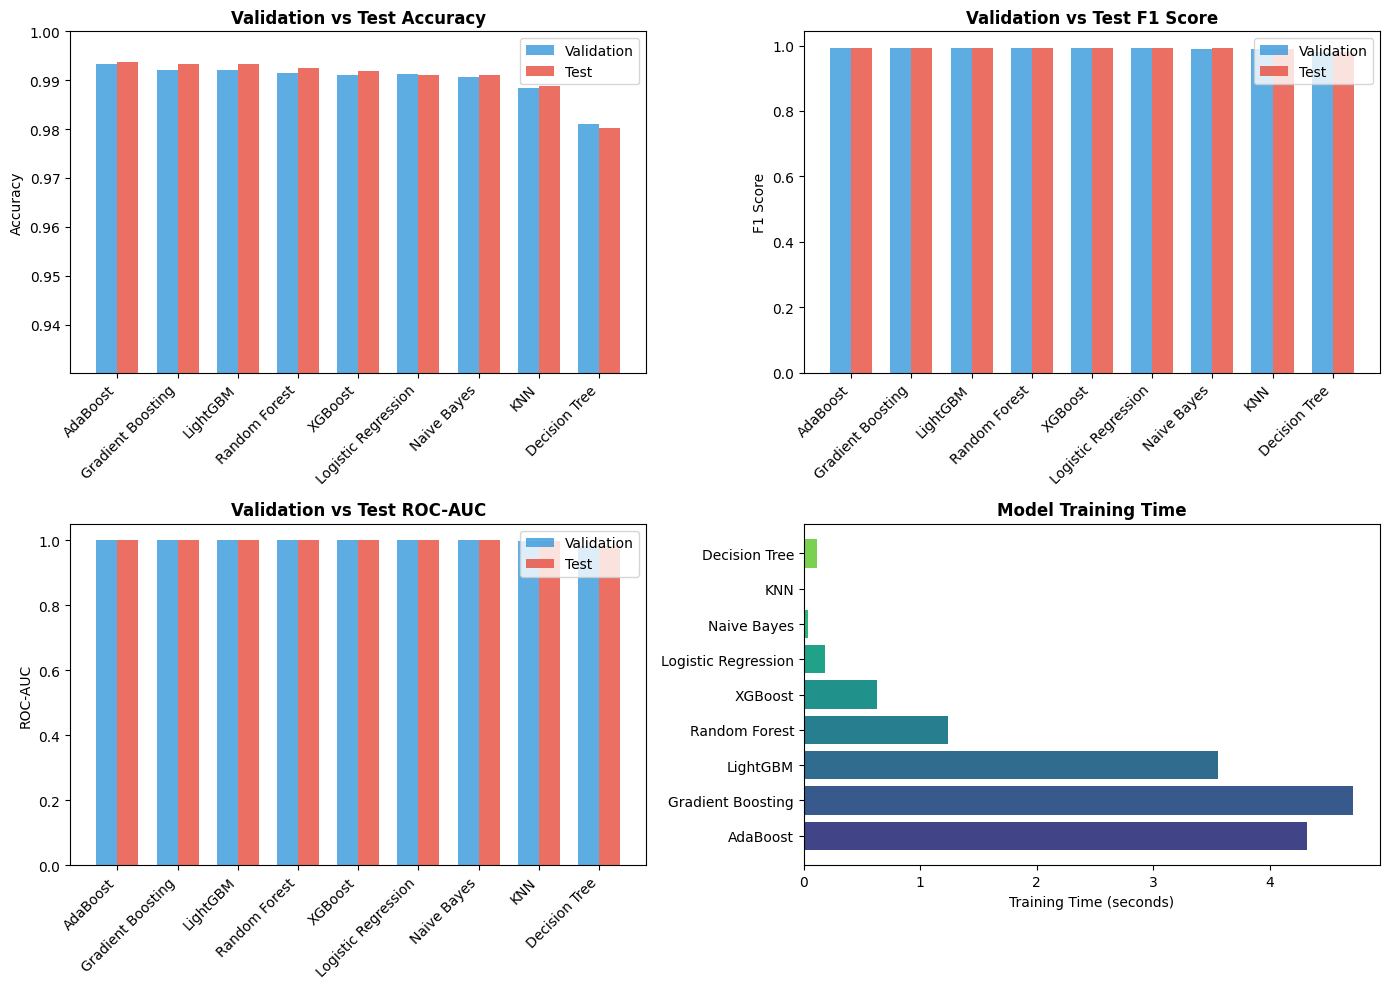


✓ Comparison chart saved as 'model_comparison.png'


In [15]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Color palette
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(comparison_df)))

# 1. Accuracy Comparison (Val vs Test)
ax1 = axes[0, 0]
x = np.arange(len(comparison_df))
width = 0.35
bars1 = ax1.bar(x - width/2, comparison_df['Val_Accuracy'], width, label='Validation', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x + width/2, comparison_df['Test_Accuracy'], width, label='Test', color='#e74c3c', alpha=0.8)
ax1.set_ylabel('Accuracy')
ax1.set_title('Validation vs Test Accuracy', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.set_ylim([min(comparison_df['Test_Accuracy'].min(), comparison_df['Val_Accuracy'].min()) - 0.05, 1.0])

# 2. F1 Score Comparison
ax2 = axes[0, 1]
bars1 = ax2.bar(x - width/2, comparison_df['Val_F1'], width, label='Validation', color='#3498db', alpha=0.8)
bars2 = ax2.bar(x + width/2, comparison_df['Test_F1'], width, label='Test', color='#e74c3c', alpha=0.8)
ax2.set_ylabel('F1 Score')
ax2.set_title('Validation vs Test F1 Score', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax2.legend()

# 3. ROC-AUC Comparison
ax3 = axes[1, 0]
roc_val = comparison_df['Val_ROC_AUC'].fillna(0)
roc_test = comparison_df['Test_ROC_AUC'].fillna(0)
bars1 = ax3.bar(x - width/2, roc_val, width, label='Validation', color='#3498db', alpha=0.8)
bars2 = ax3.bar(x + width/2, roc_test, width, label='Test', color='#e74c3c', alpha=0.8)
ax3.set_ylabel('ROC-AUC')
ax3.set_title('Validation vs Test ROC-AUC', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax3.legend()

# 4. Training Time
ax4 = axes[1, 1]
ax4.barh(comparison_df['Model'], comparison_df['Training_Time'], color=colors)
ax4.set_xlabel('Training Time (seconds)')
ax4.set_title('Model Training Time', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Comparison chart saved as 'model_comparison.png'")

In [ ]:
# Identify and display the best model
print("=" * 60)
print("BEST MODEL IDENTIFICATION")
print("=" * 60)

best_by_accuracy = comparison_df.iloc[0]
best_by_f1 = comparison_df.loc[comparison_df['Test_F1'].idxmax()]
best_by_roc = comparison_df.loc[comparison_df['Test_ROC_AUC'].idxmax()]

print(f"\n🏆 Best by Test Accuracy: {best_by_accuracy['Model']}")
print(f"   - Accuracy: {best_by_accuracy['Test_Accuracy']:.4f}")
print(f"   - F1 Score: {best_by_accuracy['Test_F1']:.4f}")
print(f"   - ROC-AUC: {best_by_accuracy['Test_ROC_AUC']:.4f}")
print(f"   - Confidence: {best_by_accuracy['Test_Mean_Confidence']:.4f}")

print(f"\n🎯 Best by Test F1 Score: {best_by_f1['Model']}")
print(f"   - Accuracy: {best_by_f1['Test_Accuracy']:.4f}")
print(f"   - F1 Score: {best_by_f1['Test_F1']:.4f}")

print(f"\n📊 Best by Test ROC-AUC: {best_by_roc['Model']}")
print(f"   - Accuracy: {best_by_roc['Test_Accuracy']:.4f}")
print(f"   - ROC-AUC: {best_by_roc['Test_ROC_AUC']:.4f}")

# Final recommendation
print("\n" + "=" * 60)
print("RECOMMENDATION")
print("=" * 60)
print(f"\nBased on overall performance metrics, the recommended model is:")
print(f">>> {best_by_accuracy['Model']} <<<")
print(f"\nModel file: saved_models/{best_by_accuracy['Model'].lower().replace(' ', '_')}_heart_risk.joblib")

# Save the best model with the standard name for easy deployment
best_model_name = best_by_accuracy['Model'].replace(' ', '_')
best_model = trained_models[best_model_name]
best_model_data = {
    'model': best_model,
    'scaler': scaler
}
best_filepath = os.path.join(models_dir, 'heart-prediction.joblib')
joblib.dump(best_model_data, best_filepath)
print(f"\n✓ Best model saved as: heart-prediction.joblib")
print(f"   Location: {os.path.abspath(best_filepath)}")

BEST MODEL IDENTIFICATION

🏆 Best by Test Accuracy: AdaBoost
   - Accuracy: 0.9936
   - F1 Score: 0.9936
   - ROC-AUC: 0.9997
   - Confidence: 0.7169

🎯 Best by Test F1 Score: AdaBoost
   - Accuracy: 0.9936
   - F1 Score: 0.9936

📊 Best by Test ROC-AUC: AdaBoost
   - Accuracy: 0.9936
   - ROC-AUC: 0.9997

RECOMMENDATION

Based on overall performance metrics, the recommended model is:
>>> AdaBoost <<<

Model file: saved_models/adaboost_heart_risk.joblib


In [ ]:
# Save comparison results to CSV
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("✓ Model comparison results saved to 'model_comparison_results.csv'")

# Save feature names for inference
feature_names = list(X.columns)
joblib.dump(feature_names, os.path.join(models_dir, 'feature_names.joblib'))
print(f"✓ Feature names saved to '{models_dir}/feature_names.joblib'")

print("\n" + "=" * 60)
print("TRAINING COMPLETE!")
print("=" * 60)
print(f"""
Summary:
- Trained {len(trained_models)} models
- All models saved in '{models_dir}/' directory
- Best model also saved as 'heart-prediction.joblib' for easy deployment
- Scaler included in each model file for preprocessing new data
- Feature names saved for inference

To use the best model for prediction:
```python
import joblib

# Load the best model (recommended for production)
model_data = joblib.load('saved_models/heart-prediction.joblib')
model = model_data['model']
scaler = model_data['scaler']
features = joblib.load('saved_models/feature_names.joblib')

# Prepare new data (DataFrame with same columns)
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
probability = model.predict_proba(new_data_scaled)
```

To use a specific model:
```python
# Load any specific model
model_data = joblib.load('saved_models/random_forest_heart-prediction.joblib')
model = model_data['model']
scaler = model_data['scaler']
```
""")

✓ Model comparison results saved to 'model_comparison_results.csv'
✓ Feature names saved to 'saved_models/feature_names.joblib'

TRAINING COMPLETE!

Summary:
- Trained 9 models
- All models saved in 'saved_models/' directory
- Scaler saved for preprocessing new data
- Feature names saved for inference

To use a model for prediction:
```python
import joblib

# Load model and scaler
model = joblib.load('saved_models/random_forest_heart_risk.joblib')
scaler = joblib.load('saved_models/scaler.joblib')
features = joblib.load('saved_models/feature_names.joblib')

# Prepare new data (DataFrame with same columns)
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
probability = model.predict_proba(new_data_scaled)
```

